(32, 32, 3, 531131)
(531131, 32, 32, 3)


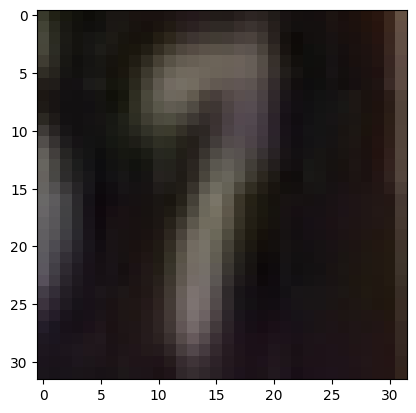

Label:  [7]
Min: 0.0, Max: 255.0


In [9]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Set random state

np.random.seed(20)
# Load the data

train_raw = loadmat('./extra_32x32.mat')
#test_raw = loadmat('./train_32x32.mat')

# Load images and labels

train_images = np.array(train_raw['X'])
#test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
#test_labels = test_raw['y']

# Check the shape of the data

print(train_images.shape)
#print(test_images.shape)

# Fix the axes of the images

train_images = np.moveaxis(train_images, -1, 0)
#test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
#print(test_images.shape)

# Plot a random image and its label

plt.imshow(train_images[13529])
plt.show()

print('Label: ', train_labels[13529])

# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
#test_images = test_images.astype('float64')

# Convert train and test labels into 'int64' type

train_labels = train_labels.astype('int64')
#test_labels = test_labels.astype('int64')

# Normalize the images data

print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
#test_images /= 255.0

# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
#test_labels = lb.fit_transform(test_labels)

# Split train data into train and validation sets

X_train, X_temp, y_train, y_temp = train_test_split(train_images, train_labels,
                                                  test_size=0.3, random_state=22)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=22)

#y_temp.shape

In [10]:
from tensorflow.keras import layers, models, callbacks

# Data augmentation

datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)
model = keras.Sequential([
    keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])


# Callback để lưu lại mô hình có val tốt nhất
checkpoint = callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Huấn luyện mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [11]:
# Fit model in order to make predictions

history = model.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=30, validation_data=(X_val, y_val), callbacks=[checkpoint])
model.save('saved_model.h5')

Epoch 1/30
2905/2905 [==============================] - 329s 107ms/step - loss: 0.4836 - accuracy: 0.8521 - val_loss: 0.1753 - val_accuracy: 0.9482
Epoch 2/30
2905/2905 [==============================] - 288s 99ms/step - loss: 0.2609 - accuracy: 0.9229 - val_loss: 0.1361 - val_accuracy: 0.9608
Epoch 3/30
2905/2905 [==============================] - 283s 98ms/step - loss: 0.2084 - accuracy: 0.9393 - val_loss: 0.1160 - val_accuracy: 0.9684
Epoch 4/30
2905/2905 [==============================] - 282s 97ms/step - loss: 0.1827 - accuracy: 0.9476 - val_loss: 0.1083 - val_accuracy: 0.9707
Epoch 5/30
2905/2905 [==============================] - 278s 96ms/step - loss: 0.1673 - accuracy: 0.9529 - val_loss: 0.0995 - val_accuracy: 0.9732
Epoch 6/30
2905/2905 [==============================] - 277s 95ms/step - loss: 0.1530 - accuracy: 0.9567 - val_loss: 0.0937 - val_accuracy: 0.9752
Epoch 7/30
2905/2905 [==============================] - 280s 96ms/step - loss: 0.1458 - accuracy: 0.9589 - val_loss: 

In [12]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

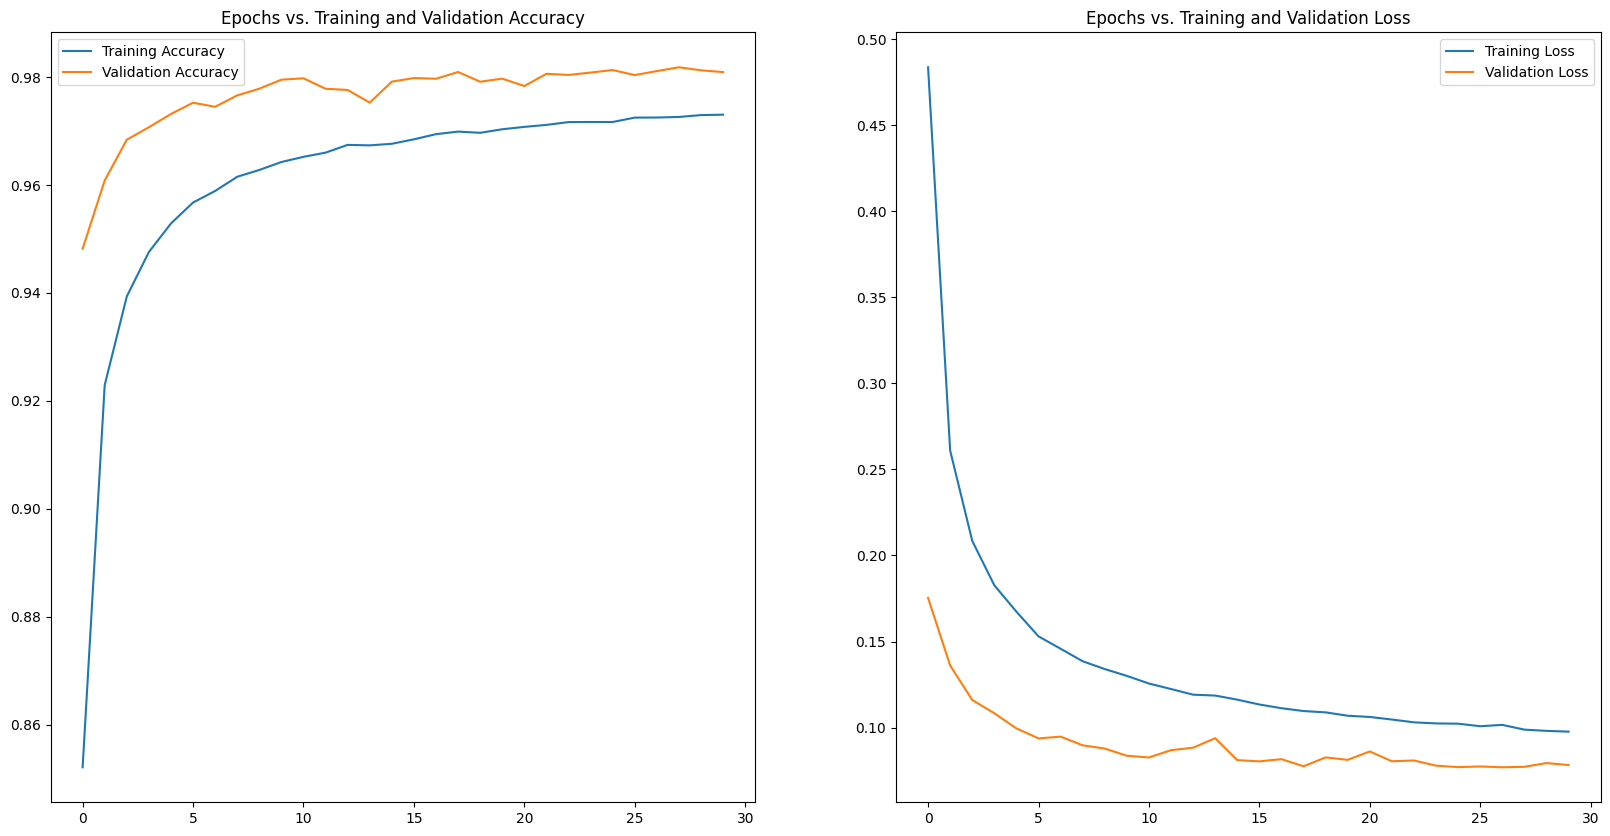

In [13]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [14]:
import tensorflow as tf
model = tf.keras.models.load_model("./best_model.h5")
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.format(test_acc, test_loss))


Test accuracy is: 0.9818 
Test loss is: 0.0789


In [18]:
# Get predictions and apply inverse transformation to the labels

y_pred = model.predict(X_test)

y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_test = lb.inverse_transform(y_test, lb.classes_)

2490/2490 [==============================] - 31s 13ms/step


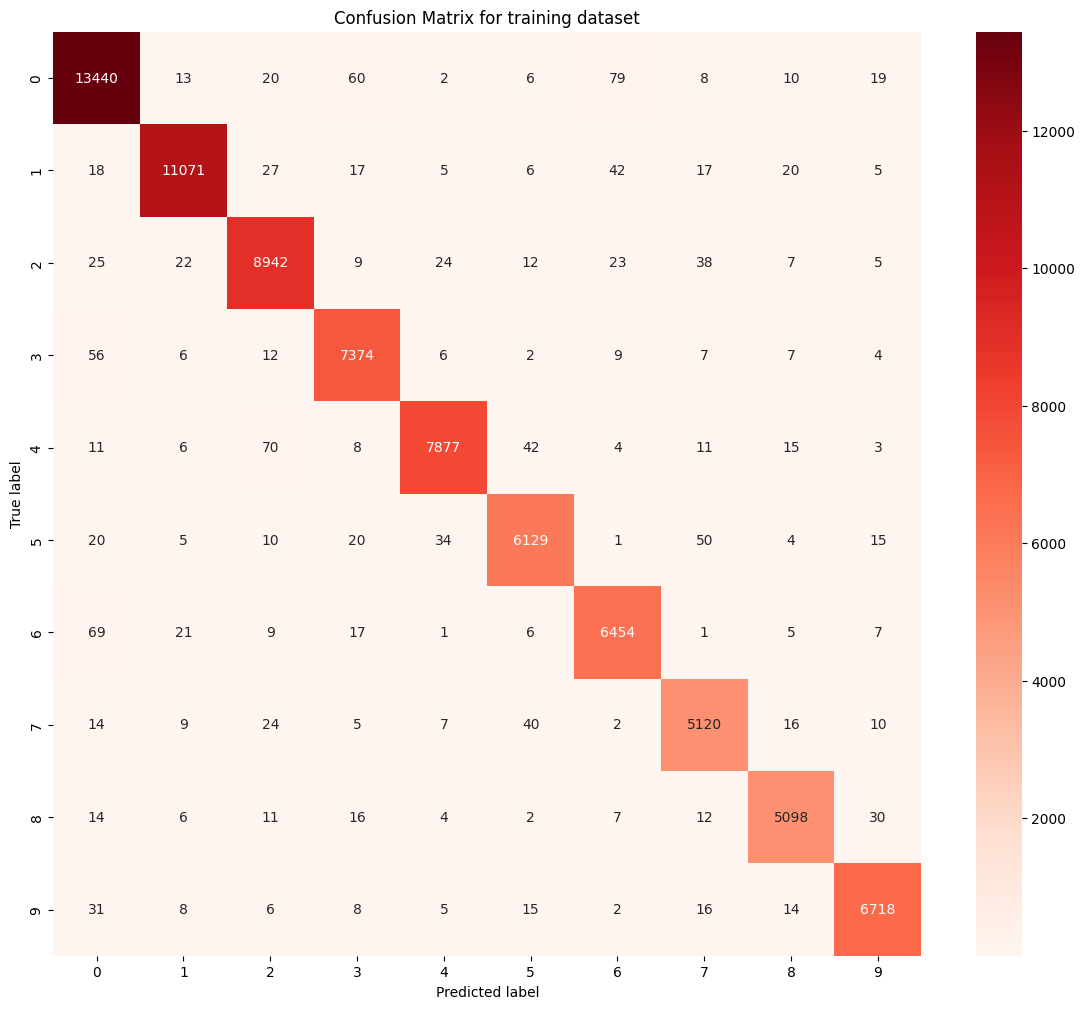

In [20]:
# Plot the confusion matrix

matrix = confusion_matrix(y_test, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Reds', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [21]:
import tensorflow as tf

# Đường dẫn đến mô hình đã huấn luyện (.h5)
model_path = './best_model.h5'

# Tải mô hình đã huấn luyện
model = tf.keras.models.load_model(model_path)

# Chuyển đổi mô hình sang định dạng TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Lưu mô hình TFLite vào tệp .tflite
tflite_model_path = 'best_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\TRAIST~1\AppData\Local\Temp\tmpdvpwdm2s\assets


INFO:tensorflow:Assets written to: C:\Users\TRAIST~1\AppData\Local\Temp\tmpdvpwdm2s\assets


ĐÁNH GIÁ MÔ HÌNH VỚI TẬP DỮ LIỆU THỰC TẾ

In [1]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import cv2
def rulerNumberClassification(image, conf):
    """
    Phân loại chữ số của một ảnh\n
    Args:
        image (Opencv) : Hình ảnh đầu vào
        conf : Ngưỡng
    Returns
        Một chữ số đại diện cho chữ số dự đoán từ ảnh đầu vào
    """
    model = keras.models.load_model('./Model/best_model.h5')
    image = cv2.resize(image, (28, 28))
    cv2.imwrite("test.png", image)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_array = np.array(image)

    # red_values = []
    # for row in range(img_array.shape[0]):
    #     for col in range(img_array.shape[1]):
    #         red_values.append(img_array[row][col][0])
    #         if (img_array[row][col][0] > 30) and (img_array[row][col][1] < 30 or img_array[row][col][2] < 30):  # if red value is greater than 70
    #             img_array[row][col] = [50, 0, 0]  # change color to black
    #         else:
    #             img_array[row][col] = [255, 255, 255]  # change color to white

    # Thêm một chiều cho mảng numpy để phù hợp với input shape của mô hình
    img_array = np.expand_dims(img_array, axis=0)
    print(img_array.shape)

    # Chuẩn hóa dữ liệu về khoảng [0, 1]
    img_array = img_array / 255.0

    # Dự đoán lớp của ảnh
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    # In ra kết quả dự đoán 

    if 0 <= predicted_class <= 8:
        if predictions[0][predicted_class] >= conf:
            print(f"Kết quả dự đoán : {predicted_class + 1}, xác suất : {predictions[0][predicted_class]}")
            return predicted_class + 1
    else:
        if predictions[0][predicted_class] >= conf:
            print(f"Kết quả dự đoán : {0}, xác suất : {predictions[0][predicted_class]}")
            return 0
image = cv2.imread("./DataTest/numberDetectedCropped_0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, image = cv2.threshold(image, 90 ,255,0)
cv2.imwrite("test.png", image)
rulerNumberClassification(image, 0.8)

OSError: No file or directory found at ./Model/best_model.h5